Olavo Morais Borges Pereira - 11297792

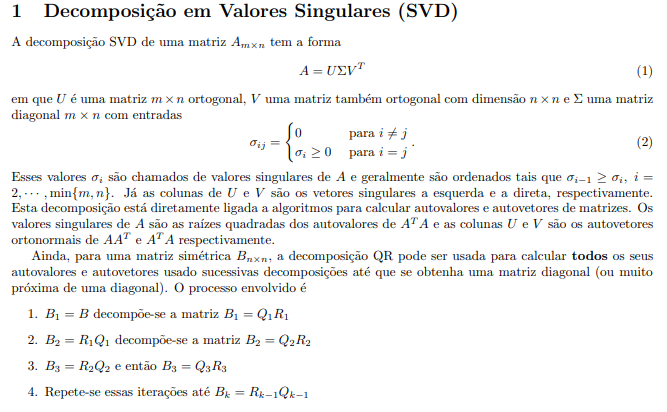
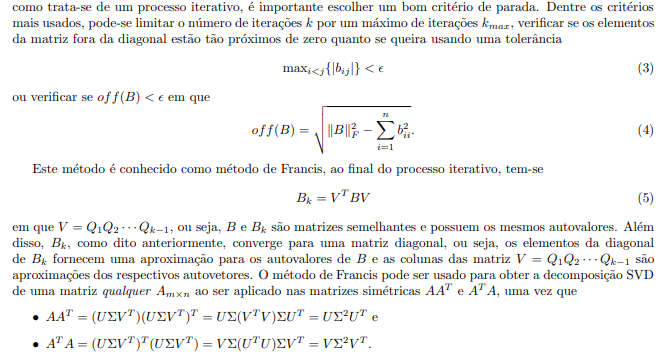

In [257]:
#Importando bibliotecas usadas
import numpy as np
import scipy
from matplotlib.image import imread
import matplotlib.pyplot as plt
import math

a) Escreva um código implementando o método de Francis usando a função numpy.linalg.qr para obter as decomposições QR necessárias.

In [258]:
#Recebe uma matriz e retorna seus autovalores e autovetores
def francis(A):
  n=np.shape(A)[0]
  Ai=A.copy()
  V=np.eye(n)#Matriz identidade

  for i in range(0,1000):
    Qi,Ri=np.linalg.qr(Ai)#Faz a decomposição QR da matriz A_i
    Ai=np.matmul(Ri,Qi)#Obtém a nova matriz A_i
    V=np.matmul(V,Qi)#Obtém a nova matriz V

  return[Ai,V]#Retorna a matriz cuja diagonal possui os autovalores de A e também retorna a matriz cujas colunas são autovetores de A

#Testanto a função
A=[[1,2],[3,4]]
print(francis(A))

[array([[ 5.37228132,  1.        ],
       [ 0.        , -0.37228132]]), array([[-0.41597356, -0.90937671],
       [-0.90937671,  0.41597356]])]


b) Usando a rotina implementada para o método de Francis, escreva um código que retorne a decomposição SVD de uma matriz qualquer $A_{m\times n}$

In [259]:
#Recebe uma matriz A e retorna sua decomposição SVD
def svd(A):
  #Utiliza o método de Francis para calcular as matrizes U,S,V
  U=francis(np.matmul(A,A.T))[1]
  S,V=francis(np.matmul(A.T,A))

  #Tira a raiz quadrada de todos os elementos de S
  S=np.sqrt(S)
  return [U,S,V]#Retorna o resultado obtido

#Testanto a função
A=[[1,2],[3,4]]
A=np.array(A)

#Exibe o resultado obtido pela minha função
print(svd(A)[0])
print(svd(A)[1])
print(svd(A)[2])

#Exibe o resultado obtido pela função da biblioteca Numpy
print("-----")
print(np.linalg.svd(A,full_matrices=True)[0])
print(np.linalg.svd(A,full_matrices=True)[1])
print(np.linalg.svd(A,full_matrices=True)[2])
#Obs, minha função retorna a matriz S com elementos apenas na diagonal enquanto a função do Numpy retorna um vetor com os elementos da diagonal principal

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[[5.46498570e+00 5.91777664e-08]
 [0.00000000e+00 3.65966191e-01]]
[[-0.57604844 -0.81741556]
 [-0.81741556  0.57604844]]
-----
[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[5.4649857  0.36596619]
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


c) Podemos armazenar uma imagem em uma matriz $A_{m\times n}$. Toda imagem consiste em um conjunto de pixels que são os blocos de construção dessa imagem. Cada pixel representa a cor ou a intensidade da luz em um local específico na imagem. Em uma imagem em escala de cinza em formato PNG, cada pixel tem um valor entre 0 e 1, em que 0 corresponde ao preto e 1 corresponde ao branco. Assim, uma imagem em escala de cinza com $m\times n$ pixels pode ser armazenada em uma matriz $m\times n$ com valores entre 0 e 1. Use a função imread() da biblioteca Matplotlib do Python para carregar uma imagem de uma foto pessoal em escala de cinza. Depois, use as decomposições SVD numpy.linalg.svd e a implementada no ítem 2) para comprimir a imagem, representando-a por k (k < min{m, n}) valores singulares, isto é, troque a matriz A por Ak = U[:, : k] ∗ Σ[: k, : k] ∗ V
T
[: k, :].
Plote a imagem original e a imagem 50% e 70% comprimida e compare os resultados. Para tal, use a função imshow(), também da biblioteca Matplotlib

[[[0.92156863 0.92156863 0.92156863 1.        ]
  [0.92156863 0.92156863 0.92156863 1.        ]
  [0.92156863 0.92156863 0.92156863 1.        ]
  ...
  [0.9490196  0.9490196  0.9490196  1.        ]
  [0.94509804 0.94509804 0.94509804 1.        ]
  [0.94509804 0.94509804 0.94509804 1.        ]]

 [[0.92156863 0.92156863 0.92156863 1.        ]
  [0.92156863 0.92156863 0.92156863 1.        ]
  [0.92156863 0.92156863 0.92156863 1.        ]
  ...
  [0.94509804 0.94509804 0.94509804 1.        ]
  [0.9490196  0.9490196  0.9490196  1.        ]
  [0.9490196  0.9490196  0.9490196  1.        ]]

 [[0.9254902  0.9254902  0.9254902  1.        ]
  [0.9254902  0.9254902  0.9254902  1.        ]
  [0.91764706 0.91764706 0.91764706 1.        ]
  ...
  [0.9490196  0.9490196  0.9490196  1.        ]
  [0.9490196  0.9490196  0.9490196  1.        ]
  [0.9529412  0.9529412  0.9529412  1.        ]]

 ...

 [[0.5254902  0.5254902  0.5254902  1.        ]
  [0.49411765 0.49411765 0.49411765 1.        ]
  [0.41960

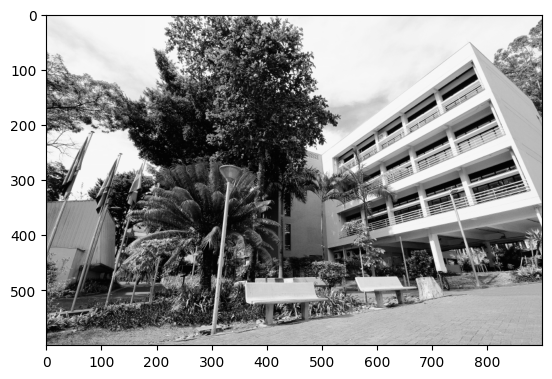

[[0.92156863 0.92156863 0.92156863 ... 0.94901961 0.94509804 0.94509804]
 [0.92156863 0.92156863 0.92156863 ... 0.94509804 0.94901961 0.94901961]
 [0.9254902  0.9254902  0.91764706 ... 0.94901961 0.94901961 0.95294118]
 ...
 [0.52549022 0.49411765 0.41960785 ... 0.72549021 0.70588237 0.69803923]
 [0.54509807 0.55686277 0.52941179 ... 0.65490198 0.6901961  0.60000002]
 [0.52941179 0.49411765 0.47058824 ... 0.7019608  0.67450982 0.6901961 ]]


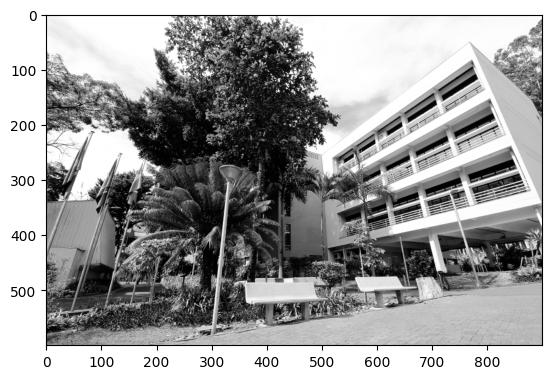

In [260]:
#Imagem PNG armazena 3 valores por pixel (RGB) mesmo que a imagem esteja em escala de cinza.
#Essa função recebe o nome do arquivo e retorna uma matriz com apenas um valor por pixel
def ConverterParaMatriz(url):
  imagem_original=imread(url)#Lê o arquivo
  print(imagem_original) #Exibe o arquivo
  plt.imshow(imagem_original)
  plt.show()

  #Cria a matriz com apenas um valor por pixel
  altura_imagem=len(imagem_original)
  largura_imagem=len(imagem_original[0])
  imagem_matriz=np.zeros(shape=(altura_imagem,largura_imagem))

  #Percorre a imagem original e copia o valor do pixel para a imagem_matriz
  for i in range(0,altura_imagem):
    for j in range(0,largura_imagem):
      imagem_matriz[i][j]=imagem_original[i][j][0]


  #Exibe o resultado obtido
  print(imagem_matriz)
  plt.imshow(imagem_matriz,cmap='gray')
  plt.show()

  return imagem_matriz#Retorna o resultado obtido

imagem=ConverterParaMatriz("icmc.png")

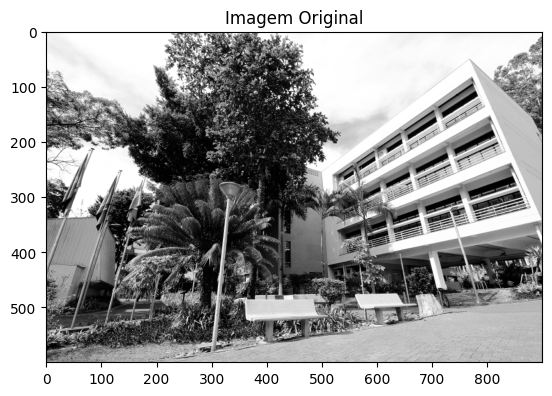

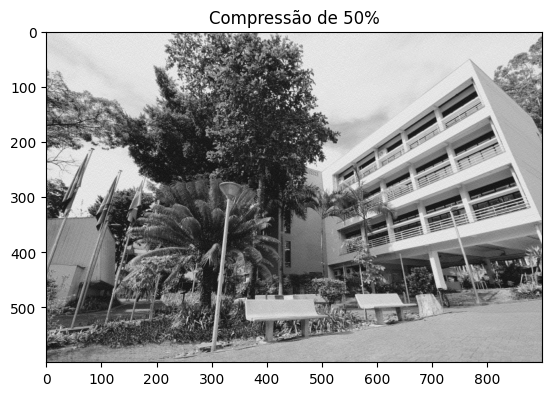

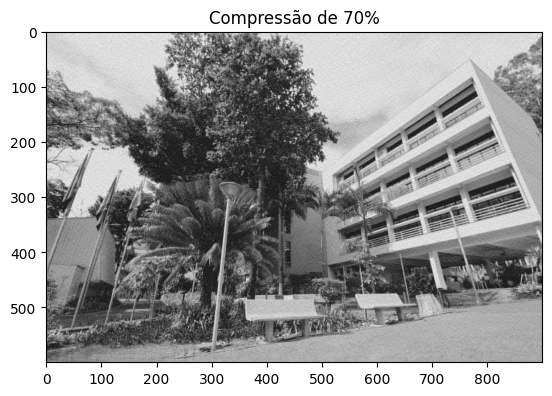

In [261]:
#Recebe uma imagem e um taxa de compressão e retorna a imagem comprimida
def ComprimirImagem(imagem,tx_compressao):
  U, S, V = np.linalg.svd(imagem) #Calcula a compressão SVD da imagem, utilizei a função pronta pois a minha é mais lenta

  #Converte o vetor S para uma matriz
  zero_matrix = np.zeros((len(S), len(S)))
  for i in range(0,len(S)):
    zero_matrix[i][i]=S[i]

  S=zero_matrix

  #Novo valor de k
  k=int((1-tx_compressao)*S.shape[0])
  imagem_comprimida=np.dot(np.dot(U[:,:k],S[:k,:k]),V[:k,:]) #Obtém a imagem comprimida

  return imagem_comprimida#Retorna o resultado obtido

#Exibe a imagem original
plt.title("Imagem Original")
plt.imshow(imagem,cmap='gray')
plt.show()

#Exibe a imagem com compressão de 50%
plt.title("Compressão de 50%")
plt.imshow(ComprimirImagem(imagem,0.5),cmap='gray')
plt.show()

#Exibe a imagem com compressão de 70%
plt.title("Compressão de 70%")
plt.imshow(ComprimirImagem(imagem,0.7),cmap='gray')
plt.show()

Questão 2

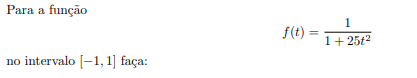

a) Implemente a interpolação de Lagrange e de Newton.

In [262]:
#Calcular o Lk(x)
def L_k(k,x,X):
  #Calcular o produtório
  produto=1
  for i in range(0,len(X)):
    if(i!=k):
      produto*=(x-X[i])/(X[k]-X[i])

  return produto

#Calcular P(x) fazendo a soma de Yk*Lk(x), Recebe x e os nós da interpolação
def Lagrange(x,X,Y):
  soma=0
  for i in range(0,len(X)):
    soma+=Y[i]*L_k(i,x,X)
  return soma

#Testa a função
X=[-2,0,3,5]
Y=[3,-2,4,2]

print(Lagrange(5,X,Y))

2.0


In [263]:
#Calcular o produto das k diferenças (x-xi)
def CalcularProdutosDiferenca(x,X,k):
  produto=1;
  for i in range(0,k):
    produto*=(x-X[i])
  return produto

#Calcula recursivamente a Matriz com a diferenças divididas para obter os coeficientes
def DefinirMatriz(X,Y):
  L=np.zeros(shape=(len(X),len(Y)))#Cria a Matriz com todos os elementos iguais a zero
  for i in range(0,len(X)):#Define a primeira coluna, Diferença dividida de ordem 0
    L[i][0]=Y[i]


  for j in range(1,len(X)):#Define os demais elementos de forma recursiva
    for i in range(0,len(X)-j):
      L[i][j]=(L[i+1][j-1]-L[i][j-1])/(X[i+j]-X[i])

  return L#Retorna a matriz

#Calcular P(x), Recebe o valor x, Vetor com as coordenadas x dos nós da interpolação e a matriz com as diferenças divididas
def Newton(x,X,L):
  soma=0;
  for i in range(0,len(X)):
    soma+=L[0][i]*CalcularProdutosDiferenca(x,X,i)#Utiliza a primeira linha da matriz como coeficientes
  return soma;


#Testa a função
X=[-2,0,3,5]
Y=[3,-2,4,2]
L=DefinirMatriz(X,Y)
print(Newton(5,X,L))

2.0


b) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior

In [264]:
#Função que calcular o valor de f(x)
def f(x):
  return 1/(1+25*x*x)

#Divide o intervalo [a,b] em n pontos igualmente espaçados e calcula f(x) nesses pontos
def ObterPontos(a,b,n):
  X=[]
  Y=[]
  for i in range(0,n):
    X.append(a+i*(b-a)/(n-1))
    Y.append(f(X[i]))

  return [X,Y]#Retorna os pontos obtidos

#Teste da função
X,Y=ObterPontos(-1,1,5)
print(X)
print(Y)

[-1.0, -0.5, 0.0, 0.5, 1.0]
[0.038461538461538464, 0.13793103448275862, 1.0, 0.13793103448275862, 0.038461538461538464]


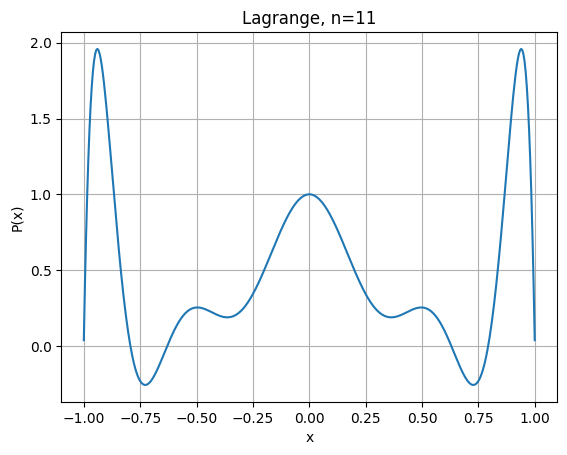

In [265]:
#Divide o intervalor [a,b] em n pontos igualmente espaçados e calcula o valor do polinômio de Lagrande em todos esses pontos, usado para desenhar o gráfico da polinômio
def ExibirGraficoLagrange(a,b,n,X,Y):
  x=[]
  y=[]
  for i in range(0,n):
    x.append(a+i*(b-a)/(n-1))
    y.append(Lagrange(x[i],X,Y))#Calcula o polinômio usando os pontos (X,Y) como nós da interpolação

  return [x,y]#Retorna os pontos obtidos


X,Y=ObterPontos(-1,1,11)#Divide o intervalo [-1,1] em 11 pontos igualmente espaçados
x_lagrange,y_lagrange=ExibirGraficoLagrange(-1,1,400,X,Y)#Calcula o valor do polinômio de Lagrange de -1 a -1, Polinômio obtido com (X,Y) como nós da interpolação

#Exibe o gráfico do polinômio obtido
plt.plot(x_lagrange, y_lagrange)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Lagrange, n=11')
plt.grid(True)
plt.show()

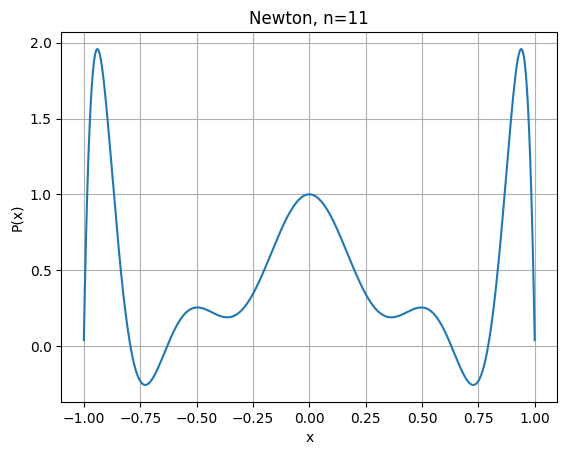

In [266]:
#Divide o intervalor [a,b] em n pontos igualmente espaçados e calcula o valor do polinômio de Newton em todos esses pontos, usado para desenhar o gráfico do polinômio
def ExibirGraficoNewton(a,b,n,X,Y):
  x=[]
  y=[]
  L=DefinirMatriz(X,Y) #Calcula os coeficientes do polinômio usando os pontos (X,Y) como nós da interpolação
  for i in range(0,n):
    x.append(a+i*(b-a)/(n-1))
    y.append(Newton(x[i],X,L))

  return [x,y]#Retorna os pontos obtidos


X,Y=ObterPontos(-1,1,11)#Divide o intervalo [-1,1] em 11 pontos igualmente espaçados
x_newton,y_newton=ExibirGraficoNewton(-1,1,400,X,Y)#Calcula o valor do polinômio de Newton de -1 a -1, Polinômio obtido com (X,Y) como nós da interpolação

#Exibe o gráifco do polinômio obtido
plt.plot(x_newton, y_newton)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Newton, n=11')
plt.grid(True)
plt.show()

Comparando os gráficos:

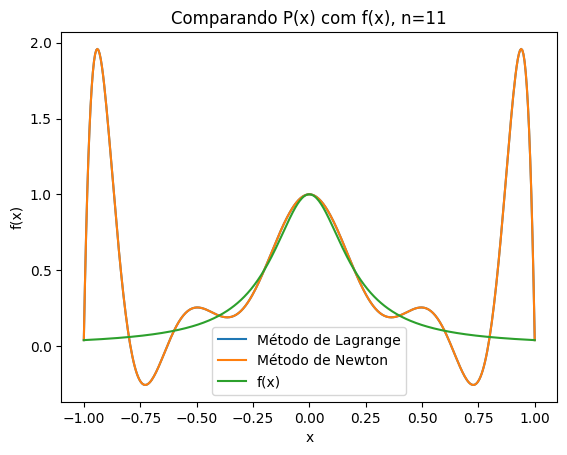

In [267]:
x_f,y_f=ObterPontos(-1,1,400) #Obtém os pontos usados para desenhar o gráfico de f(x)
plt.plot(x_lagrange,y_lagrange,label="Método de Lagrange")
plt.plot(x_newton,y_newton,label="Método de Newton")
plt.plot(x_f,y_f,label="f(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Comparando P(x) com f(x), n=11")
plt.show()

Perceba que não há diferença entre o Polinômio obtido pelo método de Newton e o Polinômio obtido pelo método de Lagrange visto que o polinômio que passa pelos 11 pontos é único.

c) Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

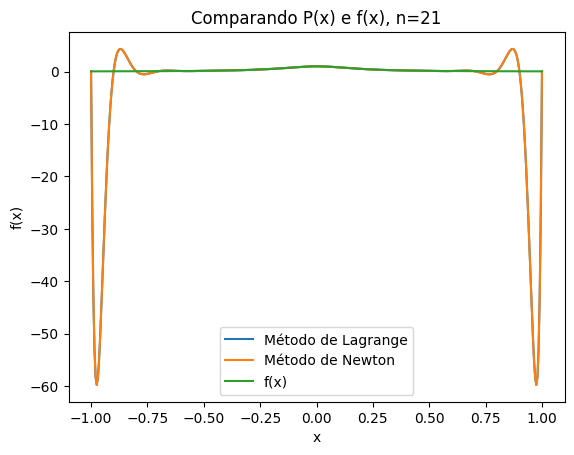

In [268]:
X,Y=ObterPontos(-1,1,21) #Divide o intervalo [-1,1] em 21 pontos igualmente espaçados

x_lagrange,y_lagrange=ExibirGraficoLagrange(-1,1,400,X,Y)#Obtém os pontos do polinômio de Lagrange, polinômio obtido usandos os pontos X,Y como nós da interpolação
x_newton,y_newton=ExibirGraficoNewton(-1,1,400,X,Y)#Obtém os pontos do polinômio de Newton, polinômio obtido usandos os pontos X,Y como nós da interpolação
x_f,y_f=ObterPontos(-1,1,400)#Obtém os pontos da f(x)

plt.plot(x_lagrange,y_lagrange,label="Método de Lagrange")
plt.plot(x_newton,y_newton,label="Método de Newton")
plt.plot(x_f,y_f,label="f(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Comparando P(x) e f(x), n=21")
plt.show()

Perceba novamente que não há diferença entre os Polinômios obtidos usando o método de Lagrange e método de Newton.

d) Usando a função scipy.interpolate.interp1d calcule a interpolação usando spline linear e cúbica. Exiba
os gráficos e comente as diferenças das soluções deste item para os anteriores.


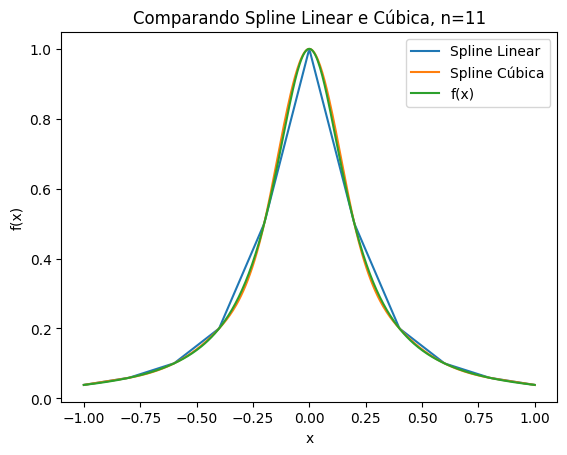

In [269]:
from scipy.interpolate import interp1d

#Obtém os pontos para desenhar o gráfico da função
def ExibirGraficoSplineLinear(a,b,n,X,Y,tipo):
  x=[]
  y=[]
  spline_linear=scipy.interpolate.interp1d(X,Y,kind=tipo)#Obtém a função interpoladora, pode ser linear ou cúbica

  #Obtém os n pontos
  for i in range(0,n):
    x.append(a+i*(b-a)/(n-1))
    y.append(spline_linear(x[i]))

  return [x,y]#Retorna os pontos obtidos

#Divide o intervalo [1,1] em 11 pontos igualmente espaçados
X,Y=ObterPontos(-1,1,11)

#Obtém os vetores usados para desenhar o gráfico
x_spline_linear,y_spline_linear=ExibirGraficoSplineLinear(-1,1,400,X,Y,"linear")
x_spline_cubica,y_spline_cubica=ExibirGraficoSplineLinear(-1,1,400,X,Y,"cubic")

#Compara a spline linear, cúbica e a função f
plt.plot(x_spline_linear,y_spline_linear,label="Spline Linear")
plt.plot(x_spline_cubica,y_spline_cubica,label="Spline Cúbica")
plt.plot(x_f,y_f,label="f(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Comparando Spline Linear e Cúbica, n=11")
plt.show()

É notável que a Spline Linear se aproxima bem da função $f$ e que a Spline Cúbica se aproxima mais ainda.

Comparando as splines linear e cúbica com o polinômio obtido com método de Lagrange e Newton.

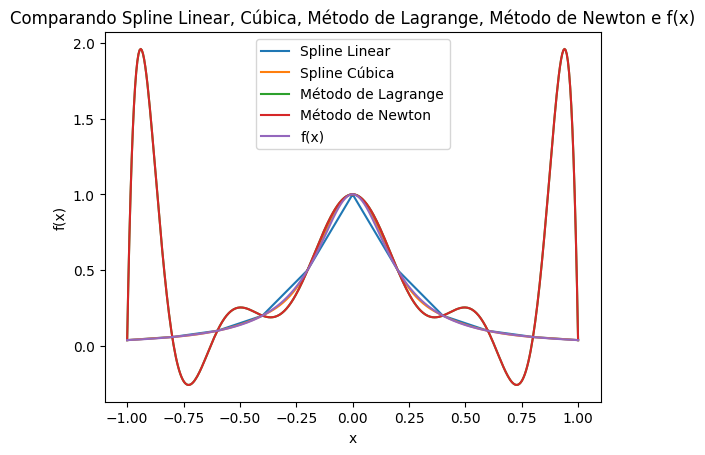

In [270]:
x_lagrange,y_lagrange=ExibirGraficoLagrange(-1,1,400,X,Y)
x_newton,y_newton=ExibirGraficoNewton(-1,1,400,X,Y)

plt.plot(x_spline_linear,y_spline_linear, label="Spline Linear")
plt.plot(x_spline_cubica,y_spline_cubica,label="Spline Cúbica")
plt.plot(x_lagrange,y_lagrange,label="Método de Lagrange")
plt.plot(x_newton,y_newton,label="Método de Newton")
plt.plot(x_f,y_f,label="f(x)")
plt.legend()

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Comparando Spline Linear, Cúbica, Método de Lagrange, Método de Newton e f(x)")
plt.show()

Tanto a Spline Linear quanto a Spline Cúbica se aproximam muito melhor do que o Polinômio obtido pelo método de Lagrange e pelo método de Newton.

e) Repita os itens b) e c) com nós de Chebyshev.

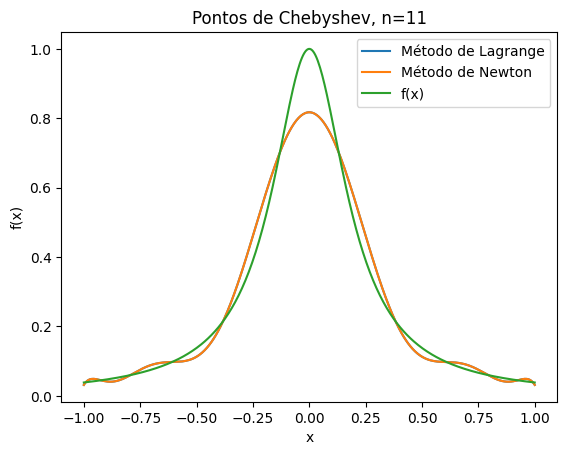

In [271]:
#Divide o intervalo [a,b] em n pontos de Chebyshev
def ObterPontosChebyshev(a,b,n):
  x=[]
  for i in range(0,n):
    x.append(((a+b)/2)+((b-a)/2)*math.cos(math.pi*(2*i+1)/(2*(n+1))))
  return x;

#Avalia f em 11 pontos usando pontos de Chebyshev
X=ObterPontosChebyshev(-1,1,11)
Y=[];
for x in X:
  Y.append(f(x))

#Calcula o Polinômio de Lagrange, Polinômio de Newton e F no intervalo [-1,1], utiliza os nós de Chebyshev como nós da interpolação
x_lagrange,y_lagrange=ExibirGraficoLagrange(-1,1,400,X,Y)
x_newton,y_newton=ExibirGraficoNewton(-1,1,400,X,Y)
x_f,y_f=ObterPontos(-1,1,400)

#Exibe os gráficos
plt.plot(x_lagrange,y_lagrange,label="Método de Lagrange")
plt.plot(x_newton,y_newton,label="Método de Newton")
plt.plot(x_f,y_f,label="f(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Pontos de Chebyshev, n=11")
plt.show()

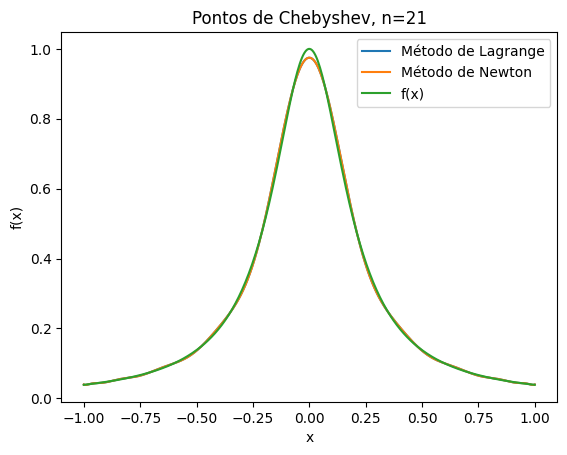

In [272]:
#Avalia f em 21 pontos usando pontos de Chebyshev
X=ObterPontosChebyshev(-1,1,21)
Y=[];
for x in X:
  Y.append(f(x))

#Calcula o Polinômio de Lagrange, Polinômio de Newton e F no intervalo [-1,1], usa os pontos de Chebyshev como nós da interpolação
x_lagrange,y_lagrange=ExibirGraficoLagrange(-1,1,400,X,Y)
x_newton,y_newton=ExibirGraficoNewton(-1,1,400,X,Y)
x_f,y_f=ObterPontos(-1,1,400)

plt.plot(x_lagrange,y_lagrange,label="Método de Lagrange")
plt.plot(x_newton,y_newton,label="Método de Newton")
plt.plot(x_f,y_f,label="f(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Pontos de Chebyshev, n=21")
plt.show()

É notável que utilizar os pontos de Chebyshev melhora muito a aproximação.

Questão 3

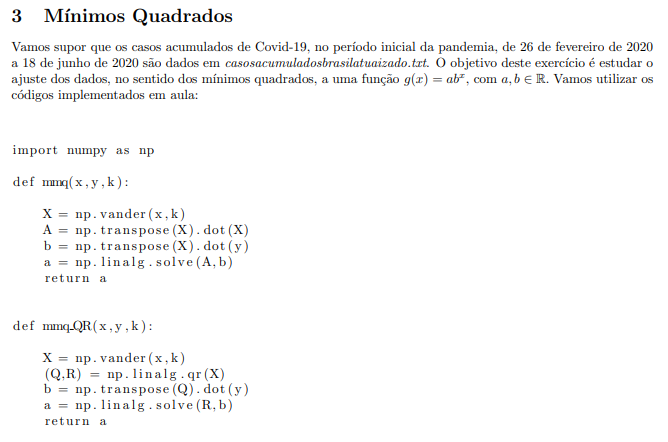

a) Explique cada um dos códigos dados acima. O que está sendo calculado ?

Ambas as funções aproximam um polinômio utilizando o método dos mínimos quadrados. A primeira função define $X$ como a matriz de Vandermonde de x e com ordem k. Depois define $A$ como sendo o produto entre $X^t\cdot X$ e $b$ como sendo o produto $X^t\cdot y$. Por fim, define $a$ como a solução do sistema formado pela matriz de coeficientes $A$ e termos homogêneos $b$ e retorna $a$.

A segunda função faz algo semelhante porém usa decomposição $QR$. A segunda função começa definindo $X$ como a matriz de Vandermonde de x e com ordem k. Depois faz a decomposição $QR$ de $X$. Define $b$ como sendo o produto $Q^t\cdot y$. Por fim, define $a$ como sendo a solução do sistema formado pela matriz de coeficientes $R$ e termos homogêneos $b$ e retorna $a$.

In [273]:
def mnq(x,y,k):
  X=np.vander(x,k)
  A=np.transpose(X).dot(X)
  b=np.transpose(X).dot(y)
  a=np.linalg.solve(A,b)
  return a

def mnq_QR(x,y,k):
  X = np.vander(x,k)
  Q,R = np.linalg.qr(X)
  b = np.transpose(Q).dot(y)
  a = np.linalg.solve(R,b)
  return a

#Testando a função
X=[-1,0,1,2]
Y=[0,-1,0,7]
print(mnq(X,Y,3))
print(mnq_QR(X,Y,3))

[ 2.   0.2 -1.6]
[ 2.   0.2 -1.6]


b) Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função $g(x)=a\cdot b^x$
, com $a,b\in ℜ$. Use um dos códigos dados acima.

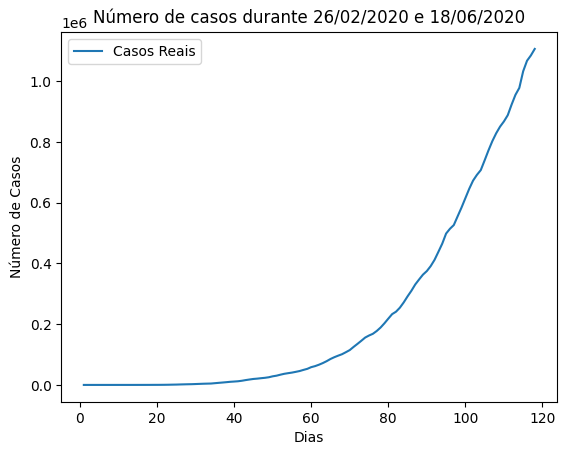

In [274]:
#Recebe um conjunto de pontos, retorna os coeficientes a,b que melhor aproximam os pontos
def AproximarPontos(X,Y):
  #Tira log de todos os pontos
  for i in range(0,len(Y)):
    Y[i]=math.log(Y[i])

  #Utiliza o método dos mínimos quadrados
  b,a=mnq_QR(X,Y,2)
  #Obtém o valor correto para a e b
  a=math.e**a
  b=math.e**b

  #Retorna Y ao seu estado anterior
  for i in range(0,len(Y)):
    Y[i]=math.e**(Y[i])

  #Retorna o resultado obtido
  return [a,b]

#Calcula o valor de g(x)=a*b^x para todos os valores de X
def ExibirGraficoExponencial(a,b,X):
  Y=[]
  for x in X:
    Y.append(a*(b**x))
  return Y

#Cria os vetores X e Y e armazena neles os dados do arquivo
X=[]
Y=[]
contador=1;
with open("casosacumuladosbrasilatuaizado.txt", 'r') as file:
  for linha in file:
    X.append(contador)
    contador+=1
    Y.append(int(linha.strip()))

#Exibindo o documento lido
plt.plot(X,Y,label="Casos Reais")
plt.legend()
plt.xlabel("Dias")
plt.ylabel("Número de Casos")
plt.title("Número de casos durante 26/02/2020 e 18/06/2020")
plt.show()

Aproximando $g(x)$ para todo o período:

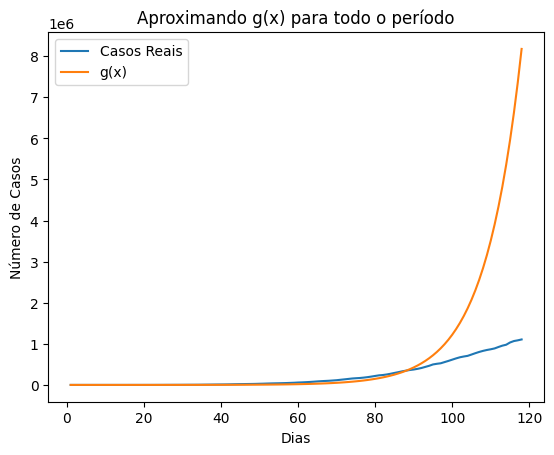

In [275]:
a,b=AproximarPontos(X,Y) #Usa o método dos mínimos quadrados nos pontos X,Y
plt.plot(X,Y,label="Casos Reais")#Desenha o gráfico de X,Y
plt.plot(X,ExibirGraficoExponencial(a,b,X),label="g(x)")#Desenha o gráfico da função obtida
plt.legend()
plt.xlabel("Dias")
plt.ylabel("Número de Casos")
plt.title("Aproximando g(x) para todo o período")
plt.show()#Exibe os gráficos

É notável que $g(x)$ não é uma boa aproximação para os últimos 30 dias

c) Repita o ítem b) usando apenas os 20 primeiros dias

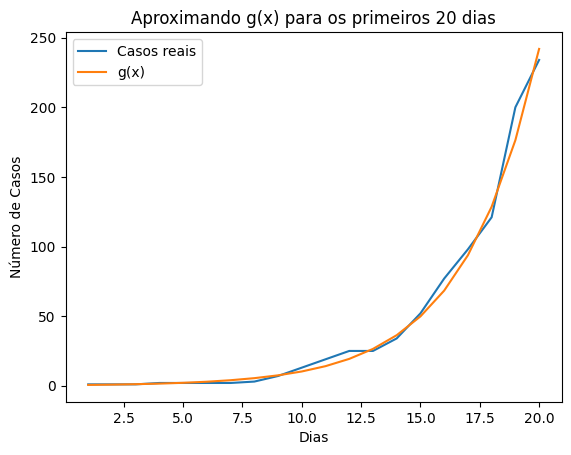

In [276]:
a,b=AproximarPontos(X[0:20],Y[0:20])#Aproxima a função apenas para os primeiros 20 pontos
#Exibe o resultado
plt.plot(X[0:20],Y[0:20],label="Casos reais")
plt.plot(X[0:20],ExibirGraficoExponencial(a,b,X[0:20]),label="g(x)")
plt.legend()
plt.xlabel("Dias")
plt.ylabel("Número de Casos")
plt.title("Aproximando g(x) para os primeiros 20 dias")
plt.show()

É possível notar que $g(x)$ se aproximou bem, indidicando que os casos reais se aproximaram de uma função exponencial durante o começo da pandemia.

Desenhando o gráfico de $g(x)$ para todo o período

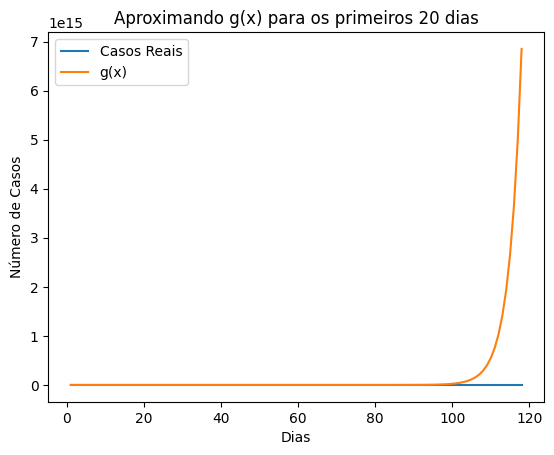

In [277]:
a,b=AproximarPontos(X[0:20],Y[0:20]) #Aproxima g(x) para os primeiros 20 dias)
#Exibe o resultado
plt.plot(X,Y,label="Casos Reais")
plt.plot(X,ExibirGraficoExponencial(a,b,X),label="g(x)")
plt.legend()
plt.xlabel("Dias")
plt.ylabel("Número de Casos")
plt.title("Aproximando g(x) para os primeiros 20 dias")
plt.show()

É possível perceber que o número de casos seria muito maior caso a doença continuasse se espalhando com a mesma taxa que os primeiros 20 dias.

d) Repita o ítem b) usando apenas os 50 últimos dias.

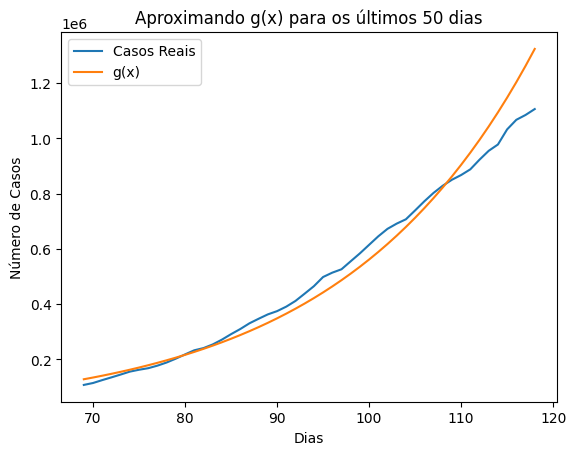

In [278]:
a,b=AproximarPontos(X[len(X)-50:len(X)],Y[len(Y)-50:len(Y)])#Aproximando g(x) para os últimos 50 dias

#Exibindo o resultado
plt.plot(X[len(X)-50:len(X)],Y[len(Y)-50:len(Y)],label="Casos Reais")
plt.plot(X[len(X)-50:len(X)],ExibirGraficoExponencial(a,b,X[len(X)-50:len(X)]),label="g(x)")
plt.legend()
plt.xlabel("Dias")
plt.ylabel("Número de Casos")
plt.title("Aproximando g(x) para os últimos 50 dias")
plt.show()

É perceptível que $g(x)$ se aproximou razoavelmente bem dos casos reais mas apresentou uma certa divergência no final.

Desenhango o gráfico de $g(x)$ para todo o período:

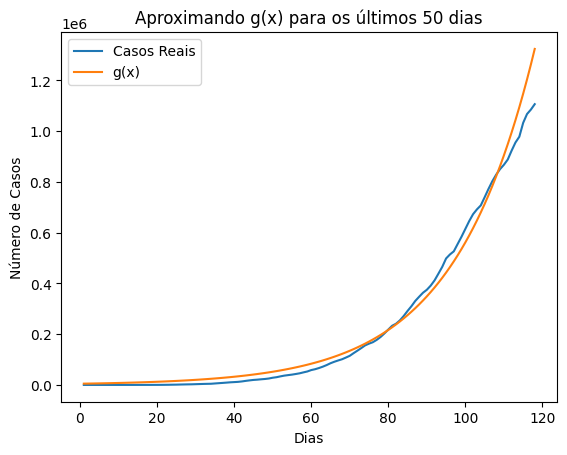

In [279]:
a,b=AproximarPontos(X[len(X)-50:len(X)],Y[len(Y)-50:len(Y)]) #Aproxima g(x) para os últimos 50 dias
#Exibindo o resultado
plt.plot(X,Y,label="Casos Reais")
plt.plot(X,ExibirGraficoExponencial(a,b,X),label="g(x)")
plt.legend()
plt.xlabel("Dias")
plt.ylabel("Número de Casos")
plt.title("Aproximando g(x) para os últimos 50 dias")
plt.show()

e) Compare os ítens b), c) e d). Que tipo de informação os dados nos fornecem ?

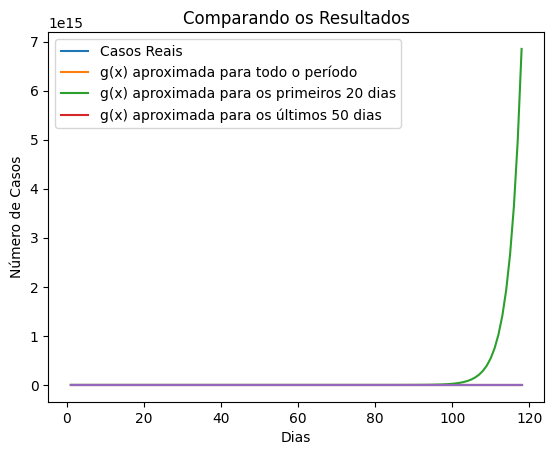

In [280]:
plt.plot(X,Y,label="Casos Reais")#Desenha o gráfico dos casos reais

#Aproxima e desenha para todo o período
a,b=AproximarPontos(X,Y)
plt.plot(X,ExibirGraficoExponencial(a,b,X),label="g(x) aproximada para todo o período")

#Aproxima para os primeiros 20 dias, desenha para todo o período
a,b=AproximarPontos(X[0:20],Y[0:20])
plt.plot(X,ExibirGraficoExponencial(a,b,X),label="g(x) aproximada para os primeiros 20 dias")

#Aproxima para os últimos 50 dias, desenha para todo o período
a,b=AproximarPontos(X[len(X)-50:len(X)],Y[len(Y)-50:len(Y)])
plt.plot(X,ExibirGraficoExponencial(a,b,X),label="g(x) aproximada para os últimos 50 dias")

plt.legend()
plt.xlabel("Dias")
plt.ylabel("Número de Casos")
plt.title("Comparando os Resultados")
plt.plot(X,Y)
plt.show()

Com os gráficos anteriores, é possível perceber que o número de casos se comportou como uma função exponencial durante o início da pandemia. Caso as medidas de isolamento e uso de máscaras não tivessem sido botadas em prática e a taxa de contaminação continuasse, então o número de casos seria muito maior.